# DataGym
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [73]:
df_descr = pd.read_csv('otp_description.csv', sep='\t', encoding='utf8')

In [74]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не знаем)

In [75]:
df_train = pd.read_csv('otp_train.csv', sep='\t', encoding='utf8')

In [76]:
df_train.shape

(15223, 52)

In [77]:
df_test = pd.read_csv('otp_test.csv', sep='\t', encoding='utf8')

In [78]:
df_test.shape

(14910, 52)

In [79]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [80]:
df_train['sample'] = 'train'
df_test['sample'] = 'test'

In [81]:
df = df_test.append(df_train).reset_index(drop=True)

In [82]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [84]:
for i in df.columns:                      # перебираем все столбцы
    if str(df[i].dtype) == 'object':      # если тип столбца - object
        print('='*10)
        print(i)                                # выводим название столбца
        print(set(df[i]))                 # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n')                             # выводим пустую строку

EDUCATION
{'Высшее', 'Среднее', 'Ученая степень', 'Неоконченное высшее', 'Среднее специальное', 'Неполное среднее', 'Два и более высших образования'}


MARITAL_STATUS
{'Не состоял в браке', 'Состою в браке', 'Разведен(а)', 'Гражданский брак', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Ресторанный бизнес/Общественное питание', 'Недвижимость', 'Здравоохранение', 'Образование', 'Государственная служба', 'Транспорт', 'ЧОП/Детективная д-ть', 'Страхование', 'Наука', 'Юридические услуги/нотариальные услуги', 'Салоны красоты и здоровья', 'СМИ/Реклама/PR-агенства', 'Строительство', 'Информационные технологии', 'Логистика', 'Металлургия/Промышленность/Машиностроение', 'Маркетинг', 'Другие сферы', 'Развлечения/Искусство', 'Управляющая компания', 'Энергетика', 'Химия/Парфюмерия/Фармацевтика', 'Торговля', 'Туризм', 'Коммунальное хоз-во/Дорожные службы', 'Сборочные производства', 'Информационные услуги', 'Банк/Финансы', 'Сельское хозяйство', 'Нефтегазовая промышленность', 'Подбор персонала'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [97]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
# так это исправляется, но результат не записывается никуда)

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Заполните их нулями

In [86]:
df = df.fillna(0)

#### Задание 2. В данных есть признаки, которые можно назвать категориальным, например семейный статус
 {'Состою в браке', 'Разведен(а)', 'Не состоял в браке', 'Вдовец/Вдова', 'Гражданский брак'}
 и таких много
#### Закодируйте их числами (например идентификаторами 1, 2, 3, ... )
#### Можно иначе, если есть идеи как.

In [87]:
cat_col = ['MARITAL_STATUS']

for col in cat_col:
    vals = set(df[col].values)
    dct = dict(zip(vals, range(len(vals))))
    #df['CAT_{}'.format(col)] = df[col].map(dct)

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками (см задание 1)
* Кодировала категориальные признаки (см задание 2) Если закодировать признаки вам не удалось - удалите все что не числа

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [88]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    df_output.drop('AGREEMENT_RK', axis=1, inplace=True)
    
    # изменение типов данных
    cols_to_change_type = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    for col in cols_to_change_type:
        df_output[col] = df_output[col].map(lambda x: x.replace(',', '.')).astype('float')
    
    # заполнение пропусков
    df_output = df.fillna(0)
    
    # кодировка категориальных переменных
    for cat_col in df_output.drop('sample', axis=1).select_dtypes(include='object').columns:
        try:
            vals = set(df_output[cat_col].values)
            dct = dict(zip(vals, range(len(vals))))
            df_output[cat_col] = df_output[cat_col].map(dct)
        except:
            df_output.drop(cat_col, axis=1, inplace=True)
        
    return df_output

In [89]:
df_preproc = df.pipe(preproc_data) # применит вашу написанную выше функцию к датафрейму и вернут новый

In [94]:
df_preproc.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,4,0,...,1,2,2,8,0,0,47,41,0.0,test
1,59910420,0,48,0,1,1,0,0,1,1,...,0,2,1,15,0,0,47,41,0.0,test
2,59911223,0,35,1,0,0,1,0,1,0,...,1,1,1,1,0,0,47,41,0.0,test
3,59911322,0,22,1,0,0,0,0,1,0,...,1,3,2,9,0,0,47,41,0.0,test
4,59911438,0,27,1,0,1,2,2,0,1,...,1,1,1,5,0,0,47,41,0.0,test


In [100]:
df_preproc.select_dtypes(include='object').head()

,sample
0,test
1,test
2,test
3,test
4,test


#### Задание 4. Выше мы собрали данные в один датафрейм и записали столбец sample, чтоб было видно где что осталось.
#### ... напишите код, который разделит df_preproc на 2 части train и test (записав в df_train_preproc и df_test_preproc соответственно)
#### ... удалив колонку sample

In [101]:
df_train_preproc = df_preproc[df_preproc['sample']=='train'].drop('sample', axis=1)
df_test_preproc  = df_preproc[df_preproc['sample']=='test'].drop('sample', axis=1)

#### Задание 5. Отделите целевую переменную и остальные признаки (речь не про train_test_split)
Выше у вас получились матрицы df_train_preproc и df_test_preproc

Должно получится:
* 2 матрицы: X и X_valid
* 2 вектора: y и y_valid


* где X - все данные df_train_preproc, кроме TARGET
* где X_valid - все данные df_test_preproc, кроме TARGET
* где y - TARGET от df_train_preproc
* где y_valid - TARGET от df_test_preproc

In [104]:
X = df_train_preproc.drop('TARGET', axis=1)
y = df_train_preproc['TARGET']

X_valid = df_test_preproc.drop('TARGET', axis=1)
y_valid = df_test_preproc['TARGET']

#### Задание 6. Обучение и оценка качества разных моделей

In [105]:
# Поделите данные X и y на 2 части (train и test, размером от исходного 70% и 30% соответственно)

from sklearn.model_selection import train_test_split

X_train, X_test, y_tarin, y_test = train_test_split(X, y, test_size=0.3)

In [108]:
print('train shape: {}'.format(y_tarin.shape[0]))
print('test  shape: {}'.format(y_test.shape[0]))

train shape: 10656
test  shape: 4567


In [109]:
# Попробовать следующие "черные ящики": интерфейс у всех одинаковый 
# Постепенно мы узнаем, что они делаютб а сейчас учимся выбирать какой работает качественнее
#     fit, 
#     predict
# записав предсказания в pred_1, pred_2, pred_3

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

tree = DecisionTreeClassifier()
rf   = RandomForestClassifier()
lr   = LogisticRegression()

In [110]:
tree.fit(X_train, y_tarin)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [111]:
rf.fit(X_train, y_tarin)

/Users/antonina.goryacheva/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [112]:
lr.fit(X_train, y_tarin)

/Users/antonina.goryacheva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [114]:
pred_1 = tree.predict(X_test)
pred_2 = rf.predict(X_test)
pred_3 = lr.predict(X_test)

In [116]:
# Посчитать метрики стандартные
# accuracy, precision, recall, а1
# в pred_1, pred_2, pred_3 у вас должны лежать предсказания разных "ящиков"
# посчитайте метрики для каждого

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [118]:
accuracy_list = [accuracy_score(y_test, pred) for pred in [pred_1, pred_2, pred_3]]
precision_list = [precision_score(y_test, pred) for pred in [pred_1, pred_2, pred_3]]
recall_list = [recall_score(y_test, pred) for pred in [pred_1, pred_2, pred_3]]
f1_list = [f1_score(y_test, pred) for pred in [pred_1, pred_2, pred_3]]

/Users/antonina.goryacheva/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/antonina.goryacheva/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [119]:
accuracy_list

[0.7851981607181957, 0.8789139478870156, 0.8808846069629954]

In [120]:
precision_list

[0.15698587127158556, 0.2631578947368421, 0.0]

In [121]:
recall_list

[0.18382352941176472, 0.009191176470588236, 0.0]

In [122]:
f1_list

[0.1693480101608806, 0.017761989342806393, 0.0]

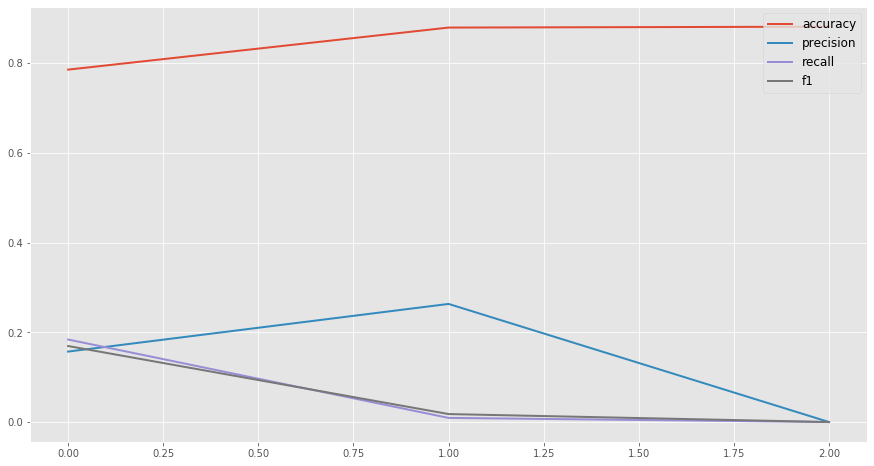

In [137]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить  качество)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает
plt.figure(figsize=(15, 8))

plt.plot(accuracy_list, label='accuracy', linewidth=2);
plt.plot(precision_list, label='precision', linewidth=2);
plt.plot(recall_list, label='recall', linewidth=2);
plt.plot(f1_list, label='f1', linewidth=2);
plt.legend(loc='upper right', fontsize=12);

In [140]:
pd.DataFrame([accuracy_list, precision_list, recall_list, f1_list], 
            columns=['Decision Tree', 'Random Forest', 'Logistic Regression'],
            index=['accuracy', 'precision', 'recall', 'f1'])

,Decision Tree,Random Forest,Logistic Regression
accuracy,0.785198,0.878914,0.880885
precision,0.156986,0.263158,0.000000
recall,0.183824,0.009191,0.000000
f1,0.169348,0.017762,0.000000


#### Задание 7. Заключительное.
#### Выше вы можете выборать самую лучшую модель "коробочку" по метрике F1
#### Теперь вы знаете какой тип коробочки из представленных лучше всего работает на данной задаче
#### Пора: 1) заново объявить эту коробочку
#### 2) обучить на всем X,y
#### 3) протестировать на отложенном X_valid, y_valid

In [141]:
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [142]:
# Взять лучшую модель и сделать предсказания для X_valid выборки
pred_final = tree.predict(X_valid)

In [149]:
# Посчитать метрики на полученном предсказании
print('accuracy_score: {}'.format(accuracy_score(y_valid, pred_final)))
print('precision_score: {}'.format(precision_score(y_valid, pred_final)))
print('recall_score: {}'.format(recall_score(y_valid, pred_final)))
print('f1_score: {}'.format(f1_score(y_valid, pred_final)))

accuracy_score: 0.7823608316566063
precision_score: 0.14657210401891252
recall_score: 0.17714285714285713
f1_score: 0.16041397153945663
